# Evolution Strategy

<p style="text-indent: 1.5em"><b>진화 전략(evolution strategy, ES)</b>은 1964년에 처음 소개되었으며, 초기 연구는 Schwefel (1965)과 Rechenberg (1965)가 주도하였습니다. 유체 역학의 문제인 바람터널, 굽은 파이프 등의 모양 최적화 연구에서 관련 파라미터를 구하는 데 이들 값을 임의로 변화시키는 것에서 시작되었습니다. 파라미터를 임의로 변화시키는 것은 자연의 진화과정에서 돌연변이와 유사하다고 볼 수 있습니다.</p>
    
<p style="text-indent: 1.5em">초기 진화 전략은 한 부모에서 돌연변이에 의해 하나의 변형된 하나의 자손을 생산하고 부모와 자손 중에서 더 좋은 개체를 다음 세대에 생존시켜 다시 자손을 생산하는 전략을 사용하였습니다. 따라서 복수해를 발생시켜 결합하는 교차연산은 없었습니다. 1970년대, 진화전략은 유전 알고리즘과 같이 복수의 개체로 구성된 해집단을 운영하는 형태로 발전하였습니다. 해집단에 있는 개체가 하나 또는 복수 개의 자손을 생산하여, 부모 개체와 자손 개체 모두에서 집단 크기만큼의 가장 좋은 개체를 확정적으로 선택하여 이들을 다음 세대의 부모로 선택되어 자손을 생성하며 진화시키는 과정을 반복합니다.</p>

<p style="text-indent: 1.5em">진화 전략과 유전 알고리즘을 유사하지만, 다음 표 1과 같이 차이점을 가지고 있습니다. 진화 전략과 유전 알고리즘은 독립적으로 탄생했지만, 현재 해집단의 진화로부터 최적해를 찾는다는 점에서 유사합니다.</p>

<div style="text-align: center; padding-top: 1em; padding-bottom: 1em;"><b>표 1 </b>진화 전략과 유전 알고리즘의 차이<br><img src="{{ site.url }}/images/figures/es-01.png" width="50%" /></div>

## 파이썬으로 구현하는 진화 전략

### (1+1)-ES

<p style="text-indent: 1.5em">처음 제안된 진화 전략은 앞에서 언급했듯이 하나의 부모개체를 돌연변이시켜 하나의 자손을 생산하고 생산된 자손개체가 문제가 갖는 제약을 만족하고 부모개체보다 더 좋으면 자손개체를 다음 세대의 부모개체로 선택하고 그렇지 않으면 부모개체를 그대로 다음 세대의 부모개체로 선택합니다. 이와 같이 한 부모에서 하나의 자손을 생산하고 이를 부모개체와 비교하여 더 좋은 개체를 선택하는 진화전략을 <b>(1+1)-ES</b>로 표현합니다. 이는 교차연산없이 돌연변이와 선택연산만 사용합니다.</p>

* **STEP 1:** $t \leftarrow 0$로 둔다.
* **STEP 2:** 제약조건을 만족하는 하나의 부모개체 $p^{t}$를 생성하고, 이를 평가한다.
* **STEP 3:** $p^{t}$를 돌연변이시켜 하나의 자손 $o^{t}$를 생산한다.
* **STEP 4:** $o^{t}$가 제약을 만족하면, 평가한다. 그렇지 않으면 단계 6으로 간다.
* **STEP 5:** $p^{t}$와 $o^{t}$ 중 더 좋은 개체를 $p^{t}$로 갱신한다.
* **STEP 6:** 종료조건을 만족하면 끝낸다. 그렇지 않으면 $t \leftarrow t+1, p^{t} \leftarrow p^{t-1}$로 두고 단계 3으로 간다.

<p style="text-indent: 1.5em">파라미터 최적화에 사용된 초기 진화 전략에서 개체는 실수 벡터의 쌍 $(\mathbf{x}, \mathbf{\sigma})$로 표현하였다. 여기서 벡터 $\mathbf{x}$는 탐색 공간의 점이고, $\mathbf{\sigma}$는 표준편차 벡터이다. $\mathbf{x}^{t}$를 돌연변이한 자손개체 $\mathbf{x}^{t+1}$는 다음과 같습니다.</p>

$$\begin{equation}
\mathbf{x}^{t+1}=\mathbf{x}^{t}+N(0,\mathbf{\sigma})
\end{equation}$$

<p style="text-indent: 1.5em">여기서 $N(0,\mathbf{\sigma})$는 평균이 0이고 표준편차가 $\sigma$인 정규분포에서 추출한 난수 벡터이다. (1+1)-ES를 다음 최대화문제의 예에 적용해봅시다.</p>

$$\begin{equation}
f(x)=x^2 \times \sin(x)^3
\end{equation}$$

In [10]:
import numpy as np


class EvolutionStrategy:
    def __init__(self, sigma, lower_bound, upper_bound, max_iter):
        self.sigma = sigma
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.max_iter = max_iter
        self.history = {'fitness': [], 'solution': []}
        
    def _generate(self):
        # =RAND()*(b-a)+a
        p = np.random.rand()*(self.upper_bound-self.lower_bound)+self.lower_bound
        return p
    
    def _check_range(self, x):
        if self.lower_bound <= x <= self.upper_bound:
            return True
    
    def _fitness(self, x):
        return x**2 * np.sin(x)**6.0
    
    def optimize(self):
        p = (self._generate(), self.sigma) # (p, sigma)
        while self.max_iter:
            o = (p[0] + np.random.normal(0, p[1]), p[1])
            if self._check_range(o[0]):
                if self._fitness(p[0]) < self._fitness(o[0]):
                    p = o
                else:
                    p = p
            else:
                pass
                
            self.history['fitness'].append(self._fitness(p[0]))
            self.history['solution'].append(p[0])
            self.max_iter -= 1        

In [11]:
es = EvolutionStrategy(1, 0, 2, 300)
es.optimize()

<p style="text-indent: 1.5em"></p>

<div style="text-align:center"><img src="{{ site.url }}/images/figures/es-01.gif"  width="50%" /><br><b>그림 1 </b>진화 전략 목적함수 최대화 과정</div><br>

<div style="text-align:center"><img src="{{ site.url }}/images/figures/es-02.gif"  width="50%" /><br><b>그림 2 </b>최적해와 진화 전략의 해</div><br>

### ($\mu$+1)-ES

<p style="text-indent: 1.5em"></p>

In [ ]:
class EvolutionStrategy:
    def __init__(self, n_vars, sigma, lower_bound, upper_bound, max_iter):
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.max_iter = max_iter
        self.history = {'fitness': [], 'solution': []}
    
    def _check_range(self, x):
        if self.lower_bound <= x <= self.upper_bound:
            return True
    
    def _fitness(self, x):
        return x**2 * np.sin(x)**6.0
    
    def optimize(self):
        p = (np.random.rand(), np.random.rand()) # (p, sigma)
        while self.max_iter:
            o = (p[0] + np.random.normal(0, p[1]), p[1])
            if self._check_range(o[0]):
                if self._fitness(p[0]) < self._fitness(o[0]):
                    x = o
                else:
                    x = x
            else:
                pass
                
            self.history['fitness'].append(self._fitness(x[0]))
            self.history['solution'].append(x[0])
            self.max_iter -= 1        

#### ($\mu$+$\lambda$)-ES

#### ($\mu$,$\lambda$)-ES

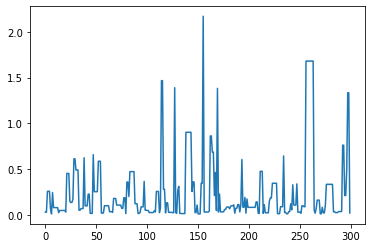

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(len(es.history['fitness'])), es.history['fitness'])
plt.show()

In [13]:
def f(x):
    return x**2 * np.sin(x)**3
#     return 1 / ((x-.3)**2 + .01) + 1 / ((x-.9)**2 + .04) - 6

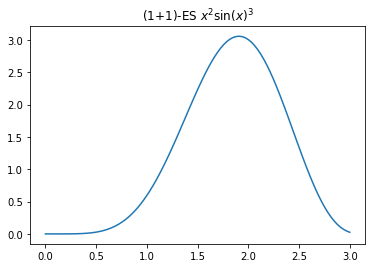

In [14]:
x = np.linspace(0, 3, 100)

plt.plot(x, f(x))
plt.title('(1+1)-ES $x^2\sin(x)^3$')
# plt.scatter(es.history['solution'], es.history['fitness'], c='r')
plt.show()

In [686]:
SimpleEvolutionStrategy()._fitness(4)

TypeError: _fitness() missing 1 required positional argument: 'x'

In [866]:
import numpy as np


class SimpleEvolutionStrategy:
    """ (1+1)-ES
    """
    def __init__(self, sigma, lower_bound, upper_bound):
        self.sigma = sigma
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
    
    def _check_range(self, x):
        if self.lower_bound <= x <= self.upper_bound:
            return x
        else:
            return (self.upper_bound-self.lower_bound) / 2
    
    def _fitness(self, x):
        return 1 / ((x-.3)**2 + .01) + 1 / ((x-.9)**2 + .04) - 6
#         return np.sin(10*x)*x + np.cos(2*x)*x 
#         return x * np.sin(x) * np.cos(x)
    
    def optimize(self):
        t = 1000
        x = np.random.randint(self.lower_bound, self.upper_bound)
        self.history = {'fitness': [], 'solution': []}
        while t:
            o = x + np.random.normal(0, 1)
#             o = np.clip(o, self.lower_bound, self.upper_bound)
            o = self._check_range(o)
            if self._fitness(x) < self._fitness(o):
                x = o
                
            self.history['fitness'].append(self._fitness(x))
            self.history['solution'].append(x)
            t -= 1
        print('Done!')
            
            
        

In [867]:
es = SimpleEvolutionStrategy(1, -5, 5)
es.optimize()

Done!


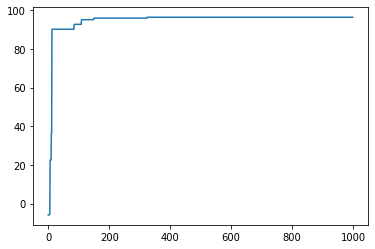

In [868]:
import matplotlib.pyplot as plt

plt.plot(range(len(es.history['fitness'])), es.history['fitness'])
plt.show()

In [869]:
def f(x):
    return 1 / ((x-.3)**2 + .01) + 1 / ((x-.9)**2 + .04) - 6
#     return np.sin(10*np.pi*x) + np.cos(x)
#     return -10*x**2 + 50

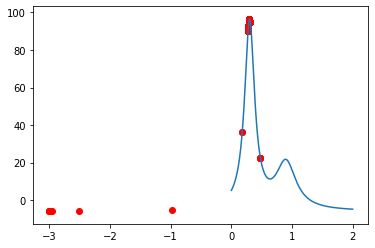

In [871]:
x = np.linspace(0, 2, 1000)

plt.plot(x, f(x))
plt.scatter(es.history['solution'], es.history['fitness'], c='r')
plt.show()

# 

In [494]:
import numpy as np


class SimpleEvolutionStrategy:
    """ (1+1)-ES
    """
    def __init__(self, fitness, n_vars, lower_bound, upper_bound):
        self.fitness = fitness
        self.n_vars = n_vars
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
    
    def _check_range(self, x):
        if self.lower_bound <= x <= self.upper_bound:
            return x
        else:
            return (self.upper_bound-self.lower_bound) / 2
    
    def optimize(self):
        t = 1000
        x = np.random.randint(self.lower_bound, self.upper_bound, size=self.n_vars)
        self.history = {'fitness': [], 'solution': []}
        print(x)
        while t:
            o = x + np.random.normal(0, 1, size=self.n_vars)
            o = np.clip(o, self.lower_bound, self.upper_bound)
            if self.fitness(x) < self.fitness(o):
                x = o
                print(x, self.fitness(x))
                
            self.history['fitness'].append(self.fitness(x))
            self.history['solution'].append(list(x))
                
            t -= 1
        print('Done!')
            
            
        

In [495]:
def f(x):
    return (1-(x[0]**2+x[1]**3)) * np.exp(-(x[0]**2+x[1]**2)/2)

es = SimpleEvolutionStrategy(f, 2, -3, 3)
es.optimize()

[-3  0]
[-3.         -0.34090571] -0.08343966531845368
[-3.          1.22537557] -0.05159547465516149
[-2.93859834  2.19756861] -0.0217471341859579
[-3.  3.] -0.004319343143033784
[-0.49413023  0.89046464] 0.029627342818474123
[0.13875731 0.85728452] 0.2405254835621946
[0.23798226 0.32762929] 0.8367057084706562
[-0.30320131 -0.81219142] 0.9915457545349784
[-0.25964703 -2.16721212] 1.0262114752380231
[-0.08007263 -1.67077425] 1.3965971846134209
[ 0.11825656 -1.60194015] 1.4028988704993592
[-0.00433767 -1.54821468] 1.421065789730402
Done!


In [496]:
v1 = []
v2 = []
for v in es.history['solution']:
    v1.append(v[0])
    v2.append(v[1])

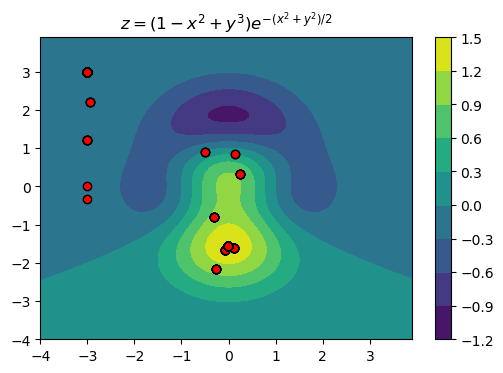

In [500]:
v1 = []
v2 = []
for v in es.history['solution']:
    v1.append(v[0])
    v2.append(v[1])

import numpy as np
import matplotlib.pyplot as plt


# the function that I'm going to plot
def fitness(x, y):
    return (1-(x**2+y**3)) * np.exp(-(x**2+y**2)/2)
 
x = np.arange(-4.0, 4.0, 0.1)
y = np.arange(-4.0, 4.0, 0.1)
X,Y = np.meshgrid(x, y) # grid of point
Z = fitness(X, Y) # evaluation of the function on the grid

fig,ax = plt.subplots(dpi=100)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.scatter(v1, v2, c='r', edgecolor='black')

# latex fashion title
ax.set_title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
plt.show()

In [635]:
import numpy as np


class EvolutionStrategy:
    """ (mu+1)-ES
    """
    def __init__(self, fitness, pop_size, n_vars, lower_bound, upper_bound):
        self.fitness = fitness
        self.pop_size = pop_size
        self.n_vars = n_vars
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        
    def optimize(self):
        t = 100
        x = np.random.randint(self.lower_bound, self.upper_bound, size=(self.pop_size, self.n_vars))
        self.history = {'fitness': [], 'solution': []}
        while t:
#             x = x + np.random.normal(0, 1, size=(self.pop_size, self.n_vars))
            x = np.clip(x, self.lower_bound, self.upper_bound)
            
            offspring = []
            for i in range(x.shape[1]):
                offspring.append(np.random.choice(x[:,i]))
            
            offspring = offspring + np.random.normal(0, 1, size=self.n_vars)
            x = np.vstack([x, offspring])
            
            mask = np.array([self.fitness(*v) for v in x]).argsort()
#             fitness = self.fitness(*x[mask[::-1]][0])
            fitness = self.fitness(*x[mask][0])
            print(fitness)

                 
#             if self.fitness(x) < self.fitness(o):
#                 x = o
#                 print(x, self.fitness(x))
                
            self.history['fitness'].append(fitness)
#             self.history['solution'].append(list(x[mask[::-1]][0]))
            self.history['solution'].append(list(x[mask][0]))
#             x = x[mask[::-1]][:self.pop_size]
            x = x[mask][:self.pop_size]
            t -= 1
        print('Done!')
            
            
        

In [636]:
def f(x, y):
    return np.sqrt(x**2 + y**2)

es = EvolutionStrategy(f, 10, 2, -3, 3)
es.optimize()

1.0
1.0
1.0
1.0
1.0
1.0
0.8552289445153742
0.8552289445153742
0.8552289445153742
0.38713682048809017
0.38713682048809017
0.38713682048809017
0.38713682048809017
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.28087088737200305
0.26312036565638014
0.26312036565638014
0.26312036565638014
0.26312036565638014
0.26312036565638014
0.26312036565638014
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112
0.21952856454499112

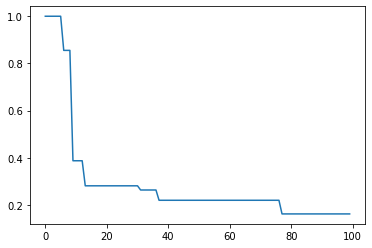

In [637]:
import matplotlib.pyplot as plt

plt.plot(range(len(es.history['fitness'])), es.history['fitness'])
plt.show()

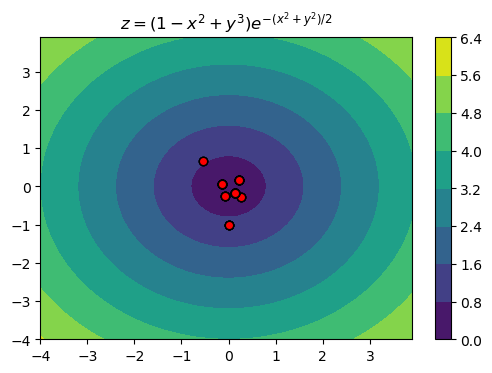

In [638]:
v1 = []
v2 = []
for v in es.history['solution']:
    v1.append(v[0])
    v2.append(v[1])

import numpy as np
import matplotlib.pyplot as plt


# the function that I'm going to plot
def fitness(x, y):
    # f: (1-(x**2+y**3)) * np.exp(-(x**2+y**2)/2)
    return np.sqrt(x**2 + y**2)
 
x = np.arange(-4.0, 4.0, 0.1)
y = np.arange(-4.0, 4.0, 0.1)
X,Y = np.meshgrid(x, y) # grid of point
Z = fitness(X, Y) # evaluation of the function on the grid

fig,ax = plt.subplots(dpi=100)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.scatter(v1, v2, c='r', edgecolor='black')

# latex fashion title
ax.set_title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
plt.show()

In [ ]:
import numpy as np


class EvolutionStrategy:
    """ (mu+1)-ES
    """
    def __init__(self, fitness, pop_size, n_vars, lower_bound, upper_bound):
        self.fitness = fitness
        self.pop_size = pop_size
        self.n_vars = n_vars
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        
    def optimize(self):
        t = 100
        x = np.random.randint(self.lower_bound, self.upper_bound, size=(self.pop_size, self.n_vars))
        self.history = {'fitness': [], 'solution': []}
        while t:
#             x = x + np.random.normal(0, 1, size=(self.pop_size, self.n_vars))
            x = np.clip(x, self.lower_bound, self.upper_bound)
            
            offspring = []
            for i in range(x.shape[1]):
                offspring.append(np.random.choice(x[:,i]))
            
            offspring = offspring + np.random.normal(0, 1, size=self.n_vars)
            x = np.vstack([x, offspring])
            
            mask = np.array([self.fitness(*v) for v in x]).argsort()
#             fitness = self.fitness(*x[mask[::-1]][0])
            fitness = self.fitness(*x[mask][0])
            print(fitness)

                 
#             if self.fitness(x) < self.fitness(o):
#                 x = o
#                 print(x, self.fitness(x))
                
            self.history['fitness'].append(fitness)
#             self.history['solution'].append(list(x[mask[::-1]][0]))
            self.history['solution'].append(list(x[mask][0]))
#             x = x[mask[::-1]][:self.pop_size]
            x = x[mask][:self.pop_size]
            t -= 1
        print('Done!')
            
            
        

In [639]:
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

In [640]:
x

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [641]:
y

array([1.5       , 1.55263158, 1.60526316, 1.65789474, 1.71052632,
       1.76315789, 1.81578947, 1.86842105, 1.92105263, 1.97368421,
       2.02631579, 2.07894737, 2.13157895, 2.18421053, 2.23684211,
       2.28947368, 2.34210526, 2.39473684, 2.44736842, 2.5       ])

In [ ]:
def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - hypothesis(x, theta0, theta1))**2, axis=2)/2

In [642]:
def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1 * x

In [649]:
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)

In [650]:
this_theta

array([1.9838    , 0.34835362])

In [651]:
this_theta

array([1.9838    , 0.34835362])

In [648]:
np.atleast_3d(np.asarray(3))

array([[[3]]])

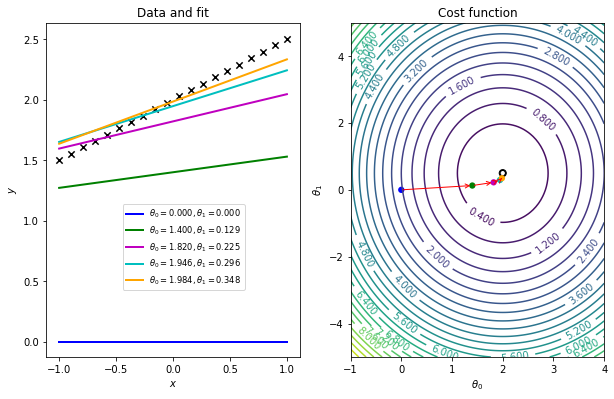

In [624]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1 * x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()

In [656]:
import pandas as pd
 
    
y = np.random.randint(0, 10, size=10)
X = np.column_stack((np.random.randint(0, 10, size=10), np.random.randint(0, 10, size=10)))
 
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [666]:
X.dot(w).flatten()

array([-160, -280, -120,  -80, -440, -120, -480, -480, -320, -440])

array([-40, -40])

In [657]:
def gradient_descent(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

In [661]:
w = np.array((-40, -40))
alpha = .1
tolerance = 1e-3
 
old_w = []
errors = []

In [659]:
iterations = 1
for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, y)
    new_w = w - alpha * gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('Gradient Descent has converged')
        break
 
    iterations += 1
    w = new_w
 
print('w =', w)

Iteration: 10 - Error: 389.9537
Iteration: 20 - Error: 48.9913
Iteration: 30 - Error: 25.2081
Iteration: 40 - Error: 23.5435
Iteration: 50 - Error: 23.4259
Iteration: 60 - Error: 23.4173
Iteration: 70 - Error: 23.4166
Gradient Descent has converged
w = [-0.81155275  1.17504986]


In [573]:
pop.shape

(10, 2)

In [568]:
pop = np.random.randint(-3,3,size=(10,2))
pop

array([[ 0, -3],
       [ 0, -2],
       [ 0,  1],
       [-2, -3],
       [-2,  1],
       [ 1, -2],
       [ 0,  0],
       [ 1,  1],
       [ 0, -2],
       [ 0, -2]])

In [577]:
test = []
for i in range(pop.shape[1]):
    test.append(np.random.choice(pop[:,i]))
            

In [578]:
test

[-3.6624240289498315, 1.9087992183116802]

In [589]:
pop

array([[-1.01939708, -2.35636414],
       [-0.0441626 , -1.67571811],
       [ 0.22238636, -1.0852894 ],
       [-0.9069993 , -2.43479486],
       [-3.66242403,  3.4123446 ],
       [ 0.95996831, -3.38979116],
       [-1.01754202,  0.39616342],
       [-0.04980845,  1.90879922],
       [-0.35186413, -1.09035023],
       [ 0.49990608, -1.37703789]])

In [588]:
np.vstack([pop,test])

array([[-1.01939708, -2.35636414],
       [-0.0441626 , -1.67571811],
       [ 0.22238636, -1.0852894 ],
       [-0.9069993 , -2.43479486],
       [-3.66242403,  3.4123446 ],
       [ 0.95996831, -3.38979116],
       [-1.01754202,  0.39616342],
       [-0.04980845,  1.90879922],
       [-0.35186413, -1.09035023],
       [ 0.49990608, -1.37703789],
       [-3.66242403,  1.90879922]])

In [571]:
sigma = np.random.randint(0,3, size=(10,2))

In [569]:
pop = pop + np.random.normal(0, 1, size=(10, 2))
pop

array([[-1.01939708, -2.35636414],
       [-0.0441626 , -1.67571811],
       [ 0.22238636, -1.0852894 ],
       [-0.9069993 , -2.43479486],
       [-3.66242403,  3.4123446 ],
       [ 0.95996831, -3.38979116],
       [-1.01754202,  0.39616342],
       [-0.04980845,  1.90879922],
       [-0.35186413, -1.09035023],
       [ 0.49990608, -1.37703789]])

In [572]:
np.random.normal(0, sigma, size=(10, 2))

array([[ 0.2191303 , -4.48001732],
       [ 0.16869018,  0.        ],
       [ 0.82451629,  0.        ],
       [ 0.        ,  2.49622693],
       [ 0.        ,  0.        ],
       [ 0.        , -0.32678977],
       [ 0.        ,  0.        ],
       [ 2.47765911,  0.32714191],
       [ 0.11611875,  1.33857513],
       [ 0.        ,  0.        ]])

In [531]:
mask = np.random.randint(0,2, size=10, dtype=bool)

In [535]:
np.random.choice(pop[:,0]), np.random.choice(pop[:,1])

(-2.2699496448474914, -0.2804981495300505)

In [541]:
vf = np.vectorize(fitness)

In [558]:
mas = np.array([fitness(*p) for p in pop]).argsort()
mas

array([3, 4, 7, 2, 9, 1, 6, 5, 0, 8])

In [564]:
pop[mas[::-1]][:10]

array([[-0.57693501, -1.03495146],
       [ 0.80234593, -1.83442281],
       [-0.64025835, -0.1336072 ],
       [ 0.5720682 , -3.17631662],
       [-2.26994964, -2.61689041],
       [-3.03478647,  2.22758239],
       [ 3.1556749 , -0.27126188],
       [-1.82518122, -0.28049815],
       [-1.79817477,  0.18232097],
       [-1.41191757,  1.89766274]])

In [ ]:
.argsort()

In [567]:
np.clip(pop, -1, 1)

array([[ 0.80234593, -1.        ],
       [-1.        , -1.        ],
       [ 1.        , -0.27126188],
       [-1.        ,  1.        ],
       [-1.        ,  0.18232097],
       [-0.64025835, -0.1336072 ],
       [ 0.5720682 , -1.        ],
       [-1.        , -0.28049815],
       [-0.57693501, -1.        ],
       [-1.        ,  1.        ]])

In [ ]:
import numpy as np


class EvolutionStrategy:
    """ (mu+1)-ES
    """
    def __init__(self, pop_size, sigma, lower_bound, upper_bound):
        self.pop_size = pop_size
        self.sigma = sigma
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
    
    def _check_range(self, x):
        if self.lower_bound <= x <= self.upper_bound:
            return x
        else:
            return (self.upper_bound-self.lower_bound) / 2
    
    def _fitness(self, x):
        return np.sin(10*x)*x + np.cos(2*x)*x 
#         return x * np.sin(x) * np.cos(x)
    
    def optimize(self):
        t = 1000
        x = np.random.randint(self.lower_bound, self.upper_bound, self.pop_size)
        self.history = {'fitness': [], 'solution': []}
        while t:
            o = x + np.random.normal(0, 1)
#             o = np.clip(o, self.lower_bound, self.upper_bound)
            o = self._check_range(o)
            if self._fitness(x) < self._fitness(o):
                x = o
                
            self.history['fitness'].append(self._fitness(x))
            self.history['solution'].append(x)
            t -= 1
        print('Done!')
            
            
        

In [324]:
def fitness(x, y):
    return 21.5 + x * np.sin(4*np.pi*x) + y + np.sin(20*np.pi*y)

In [325]:
fitness(1,1)

22.499999999999996

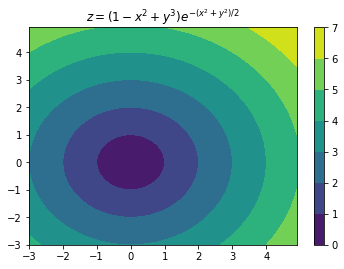

In [363]:
import numpy as np
import matplotlib.pyplot as plt


# the function that I'm going to plot
def fitness(x, y):
    return np.sqrt(x**2 + y**2)
 
x = np.arange(-3.0, 5, 0.1)
y = np.arange(-3.0, 5, 0.1)
X,Y = np.meshgrid(x, y) # grid of point
Z = fitness(X, Y) # evaluation of the function on the grid

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)

# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
plt.show()

In [ ]:
    # find non-zero fitness for selection
    def get_fitness(pred): 
        return pred.flatten()
    
    
    def make_kid(self, pop, n_kid):
        # generate empty kid holder
        kids = {'DNA': np.empty((n_kid, DNA_SIZE))}
        kids['mut_strength'] = np.empty_like(kids['DNA'])
        for kv, ks in zip(kids['DNA'], kids['mut_strength']):
            # crossover (roughly half p1 and half p2)
            p1, p2 = np.random.choice(np.arange(POP_SIZE), size=2, replace=False)
            cp = np.random.randint(0, 2, DNA_SIZE, dtype=np.bool)  # crossover points
            kv[cp] = pop['DNA'][p1, cp]
            kv[~cp] = pop['DNA'][p2, ~cp]
            ks[cp] = pop['mut_strength'][p1, cp]
            ks[~cp] = pop['mut_strength'][p2, ~cp]

            # mutate (change DNA based on normal distribution)
            ks[:] = np.maximum(ks + (np.random.rand(*ks.shape)-0.5), 0.)    # must > 0
            kv += ks * np.random.randn(*kv.shape)
            kv[:] = np.clip(kv, *DNA_BOUND)    # clip the mutated value
        return kids
    
    def kill_bad(pop, kids):
        # put pop and kids together
        for key in ['DNA', 'mut_strength']:
            pop[key] = np.vstack((pop[key], kids[key]))

        fitness = get_fitness(F(pop['DNA']))            # calculate global fitness
        idx = np.arange(pop['DNA'].shape[0])
        good_idx = idx[fitness.argsort()][-POP_SIZE:]   # selected by fitness ranking (not value)
        for key in ['DNA', 'mut_strength']:
            pop[key] = pop[key][good_idx]
        return pop

pop = dict(DNA=5 * np.random.rand(1, DNA_SIZE).repeat(POP_SIZE, axis=0),   # initialize the pop DNA values
           mut_strength=np.random.rand(POP_SIZE, DNA_SIZE))                # initialize the pop mutation strength values

from IPython.display import HTML
from matplotlib import animation, rc



def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

ax.scatter(pop['DNA'], F(pop['DNA']), s=200, lw=0, c='red', alpha=0.5)

fig, ax = plt.subplots()

x = np.linspace(*DNA_BOUND, 200)

line, = ax.plot(x, F(x))
scatt, = ax.scatter([], [])

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)


HTML(anim.to_html5_video())

for _ in range(N_GENERATIONS):
    # something about plotting
    if 'sca' in globals(): 
        sca.remove()
    sca = ax.scatter(pop['DNA'], F(pop['DNA']), s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # ES part
    kids = make_kid(pop, N_KID)
    pop = kill_bad(pop, kids)   # keep some good parent for elitism

plt.ioff()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

DNA_SIZE = 1             # DNA (real number)
DNA_BOUND = [0, 5]       # solution upper and lower bounds
N_GENERATIONS = 200
POP_SIZE = 100           # population size
N_KID = 50               # n kids per generation


Traceback (most recent call last):
  File "C:\Users\unerue\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\unerue\Anaconda3\lib\site-packages\matplotlib\animation.py", line 953, in _start
    self._init_draw()
  File "C:\Users\unerue\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1735, in _init_draw
    self._drawn_artists = self._init_func()
  File "<ipython-input-1-0a1e881ccffe>", line 72, in init
    scatt.set_data([], [])
AttributeError: 'PathCollection' object has no attribute 'set_data'


RuntimeError: Requested MovieWriter (ffmpeg) not available

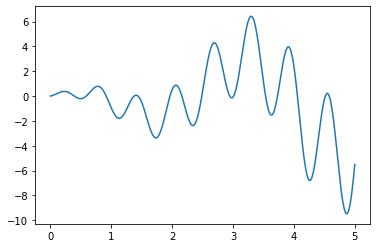

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

DNA_SIZE = 1             # DNA (real number)
DNA_BOUND = [0, 5]       # solution upper and lower bounds
N_GENERATIONS = 200
POP_SIZE = 100           # population size
N_KID = 50               # n kids per generation


def F(x): return np.sin(10*x)*x + np.cos(2*x)*x     # to find the maximum of this function


# find non-zero fitness for selection
def get_fitness(pred): return pred.flatten()


def make_kid(pop, n_kid):
    # generate empty kid holder
    kids = {'DNA': np.empty((n_kid, DNA_SIZE))}
    kids['mut_strength'] = np.empty_like(kids['DNA'])
    for kv, ks in zip(kids['DNA'], kids['mut_strength']):
        # crossover (roughly half p1 and half p2)
        p1, p2 = np.random.choice(np.arange(POP_SIZE), size=2, replace=False)
        cp = np.random.randint(0, 2, DNA_SIZE, dtype=np.bool)  # crossover points
        kv[cp] = pop['DNA'][p1, cp]
        kv[~cp] = pop['DNA'][p2, ~cp]
        ks[cp] = pop['mut_strength'][p1, cp]
        ks[~cp] = pop['mut_strength'][p2, ~cp]

        # mutate (change DNA based on normal distribution)
        ks[:] = np.maximum(ks + (np.random.rand(*ks.shape)-0.5), 0.)    # must > 0
        kv += ks * np.random.randn(*kv.shape)
        kv[:] = np.clip(kv, *DNA_BOUND)    # clip the mutated value
    return kids


def kill_bad(pop, kids):
    # put pop and kids together
    for key in ['DNA', 'mut_strength']:
        pop[key] = np.vstack((pop[key], kids[key]))

    fitness = get_fitness(F(pop['DNA']))            # calculate global fitness
    idx = np.arange(pop['DNA'].shape[0])
    good_idx = idx[fitness.argsort()][-POP_SIZE:]   # selected by fitness ranking (not value)
    for key in ['DNA', 'mut_strength']:
        pop[key] = pop[key][good_idx]
    return pop


pop = dict(DNA=5 * np.random.rand(1, DNA_SIZE).repeat(POP_SIZE, axis=0),   # initialize the pop DNA values
           mut_strength=np.random.rand(POP_SIZE, DNA_SIZE))                # initialize the pop mutation strength values

x = np.linspace(*DNA_BOUND, 200)


from IPython.display import HTML
from matplotlib import animation, rc



fig, ax = plt.subplots()

x = np.linspace(*DNA_BOUND, 200)

line, = ax.plot(x, F(x))
scatt = ax.scatter([], [], c='red', alpha=0.5, lw=0, s=200)

def init():
    scatt.set_data([], [])
    return (scatt)

def animate(i):
    x = pop['DNA']
    y = F(pop['DNA'])
    scatt.set_data(x, y)
    return (scatt)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=20, blit=True)

# anim.save('the_movie.mp4', writer = 'mencoder', fps=15)
HTML(anim.to_html5_video())

In [ ]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

ax.scatter(pop['DNA'], F(pop['DNA']), s=200, lw=0, c='red', alpha=0.5)
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

ax.scatter(pop['DNA'], F(pop['DNA']), s=200, lw=0, c='red', alpha=0.5)
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

ax.scatter(pop['DNA'], F(pop['DNA']), s=200, lw=0, c='red', alpha=0.5)



plt.plot(x, F(x))

for _ in range(N_GENERATIONS):
    # something about plotting
    if 'sca' in globals(): 
        sca.remove()
    sca = plt.scatter(pop['DNA'], F(pop['DNA']), s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # ES part
    kids = make_kid(pop, N_KID)
    pop = kill_bad(pop, kids)   # keep some good parent for elitism

plt.ioff()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

RuntimeError: Requested MovieWriter (ffmpeg) not available

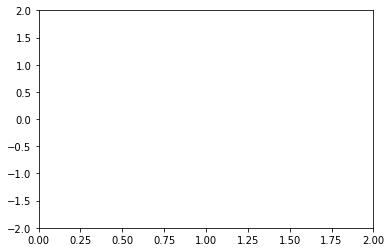

In [3]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
HTML(anim.to_html5_video())